In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [23]:
df = pd.read_csv('data.csv')

In [24]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [25]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [27]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [52]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


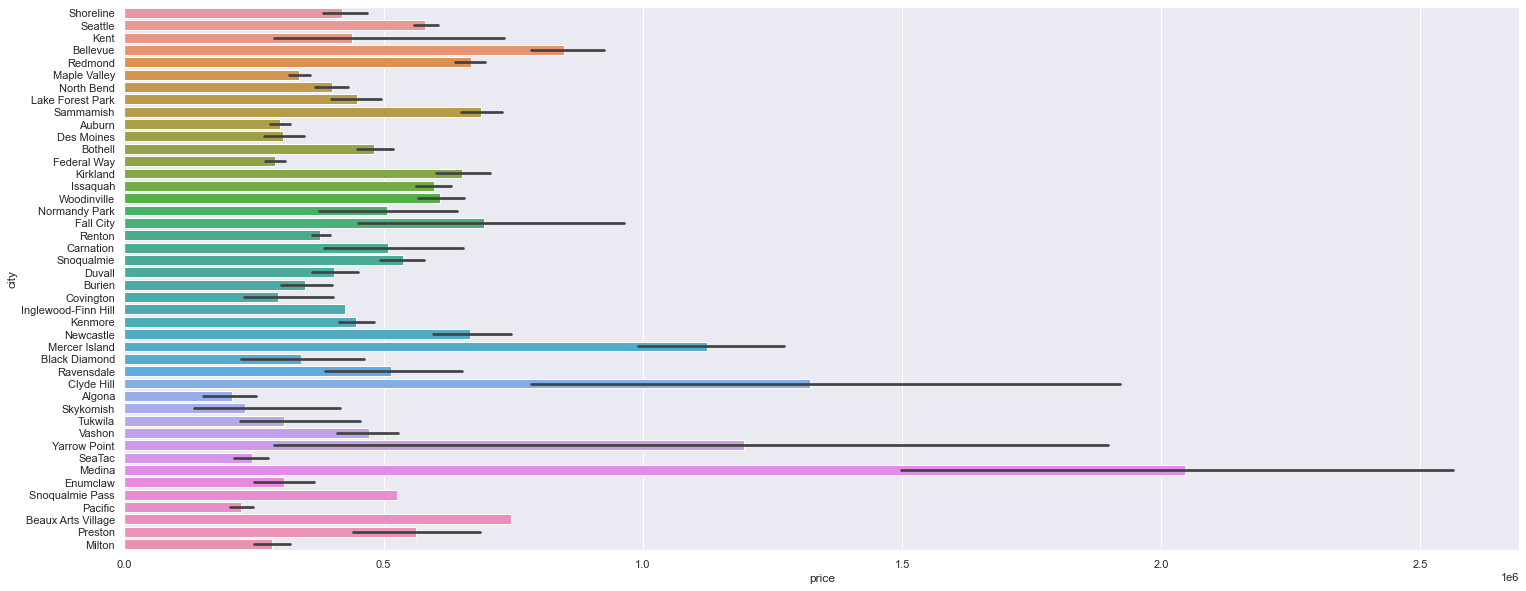

In [54]:
sns.barplot(x = 'price',y ='city',data = df)
sns.set(rc={'figure.figsize':(25,10)})

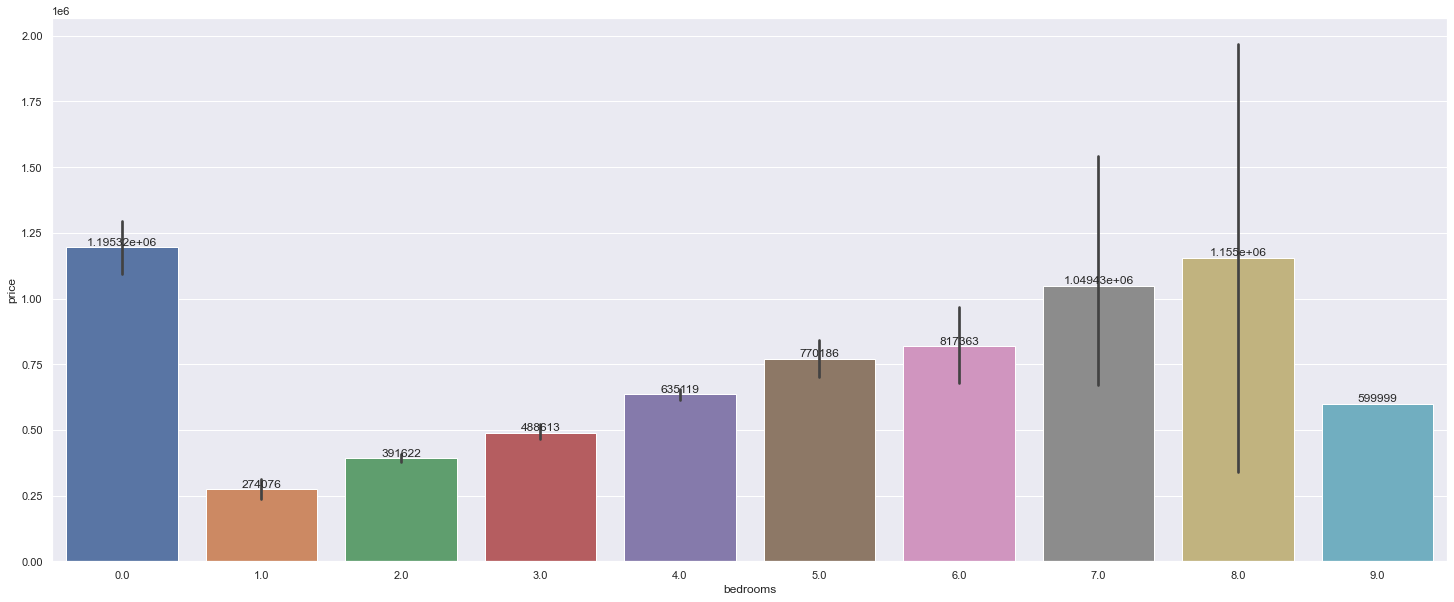

In [63]:
ax =sns.barplot(x ='bedrooms',y='price',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

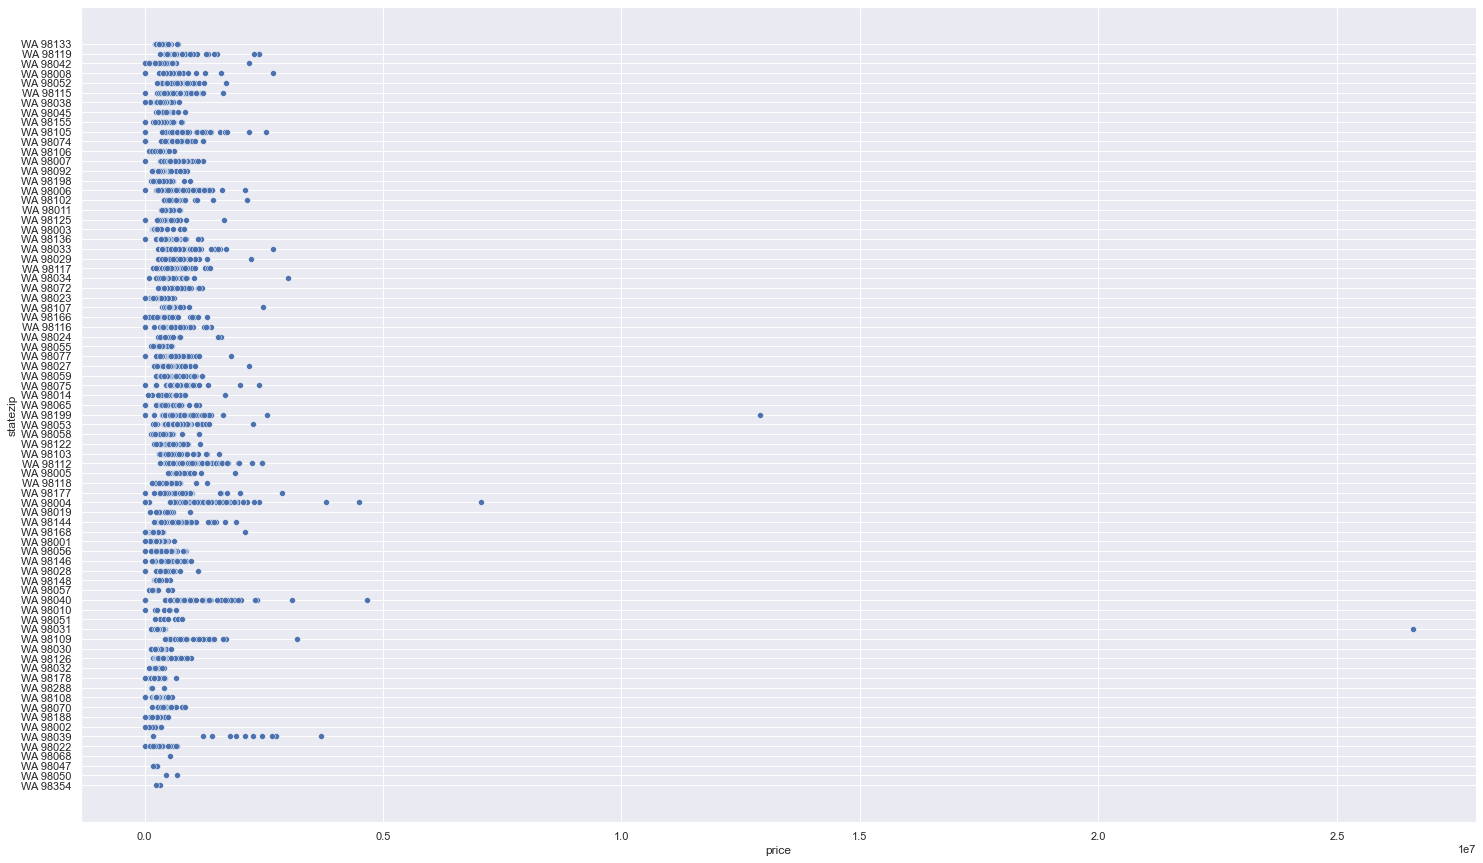

In [83]:
sns.scatterplot(x='price',y='statezip',data=df)
plt.grid(True)
sns.set(rc={'figure.figsize':(25,15)})

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

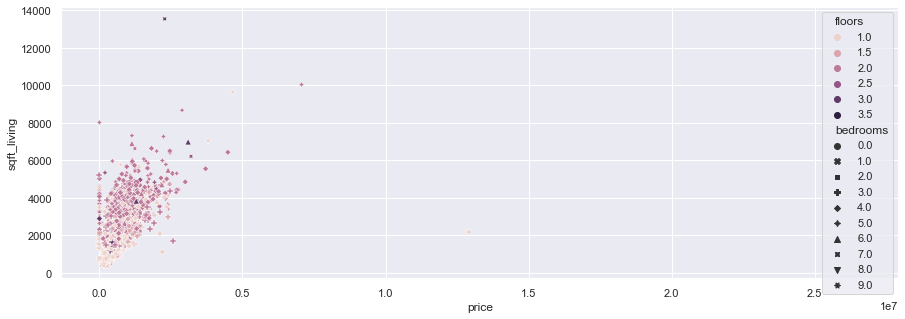

In [76]:
sns.scatterplot(x='price',y='sqft_living',hue='bathrooms',style='bedrooms',data=df)

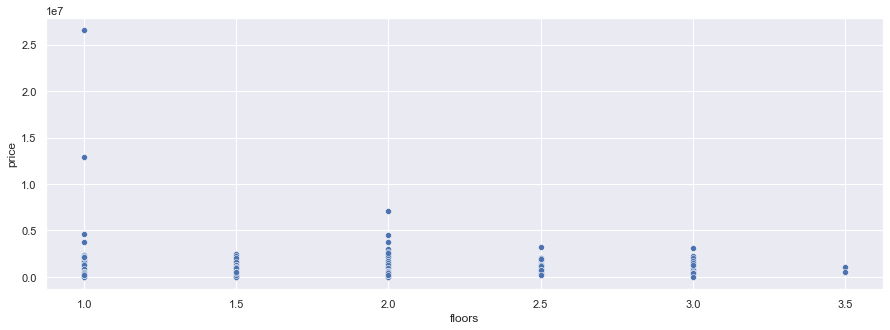

In [104]:
sns.scatterplot(x='floors',y='price',data=df)
sns.set(rc={'figure.figsize':(15,5)})

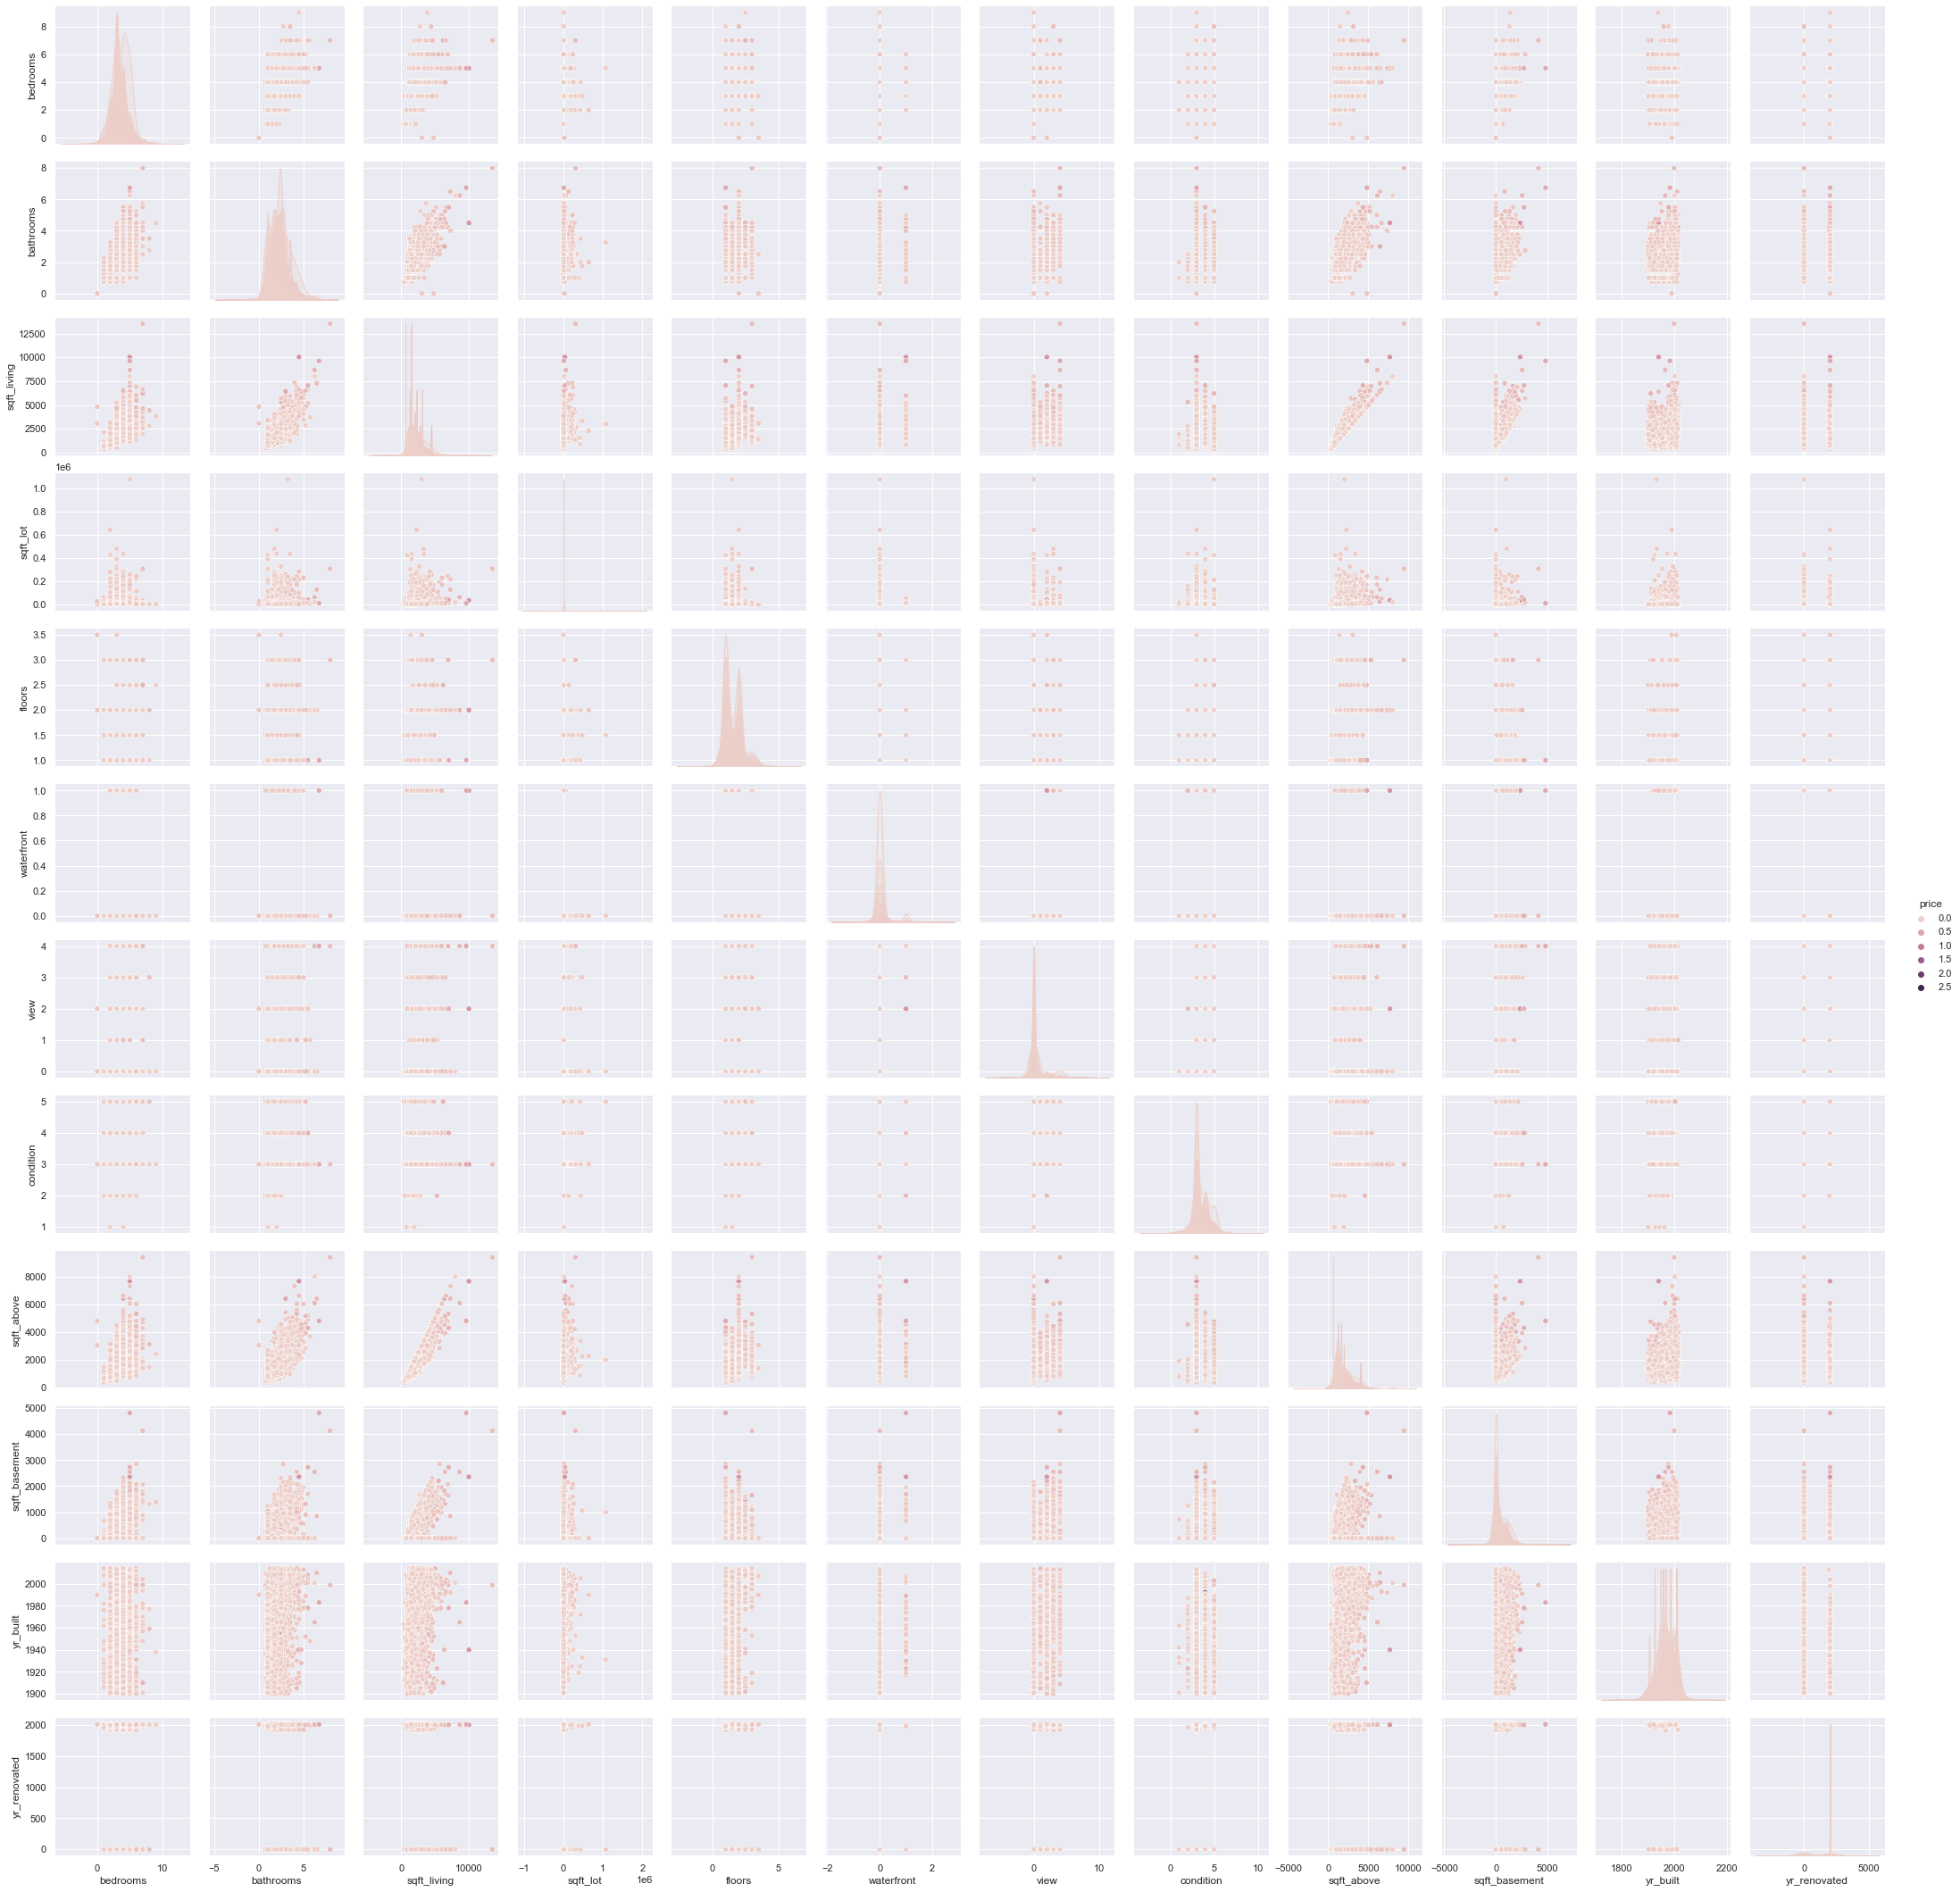

In [94]:
sns.pairplot(df,hue='price')


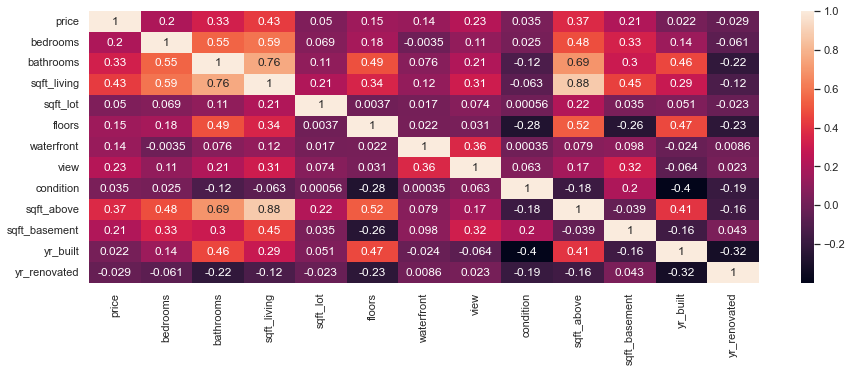

In [111]:
sns.heatmap(df.corr(),annot = True)

In [113]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()    

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,402,3,4,93,1399,1,0,0,2,96,0,55,50,1522,36,62,0
1,0,1719,5,8,406,1701,2,0,4,4,373,29,21,0,3899,35,58,0
2,0,487,3,6,180,2196,0,0,0,3,182,0,66,0,2291,18,26,0
3,0,706,3,7,191,1439,0,0,0,3,52,109,63,0,4263,3,7,0
4,0,998,4,8,181,2026,0,0,0,3,70,85,76,37,4352,31,31,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           4600 non-null   int64
 1   price          4600 non-null   int64
 2   bedrooms       4600 non-null   int64
 3   bathrooms      4600 non-null   int64
 4   sqft_living    4600 non-null   int64
 5   sqft_lot       4600 non-null   int64
 6   floors         4600 non-null   int64
 7   waterfront     4600 non-null   int64
 8   view           4600 non-null   int64
 9   condition      4600 non-null   int64
 10  sqft_above     4600 non-null   int64
 11  sqft_basement  4600 non-null   int64
 12  yr_built       4600 non-null   int64
 13  yr_renovated   4600 non-null   int64
 14  street         4600 non-null   int32
 15  city           4600 non-null   int32
 16  statezip       4600 non-null   int32
 17  country        4600 non-null   int32
dtypes: int32(4), int64(14)
memory usage: 575.1 KB


In [115]:
df1 = df.drop(columns=['price'])


In [116]:
df2 = df['price']

In [118]:
chi_score = chi2(df1,df2)
chi_score

(array([1.85923580e+04, 5.01088140e+02, 3.87826862e+03, 2.11787507e+05,
        9.08268944e+05, 2.26683859e+03, 2.12355415e+03, 5.97010739e+03,
        3.29451831e+02, 2.06225302e+05, 1.42548217e+05, 2.33388301e+04,
        4.90493491e+04, 1.40376743e+06, 1.07069376e+04, 2.07705155e+04,
                   nan]),
 array([0.00000000e+000, 1.00000000e+000, 3.62113637e-164, 0.00000000e+000,
        0.00000000e+000, 1.51237370e-016, 5.69603271e-010, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
                    nan]))

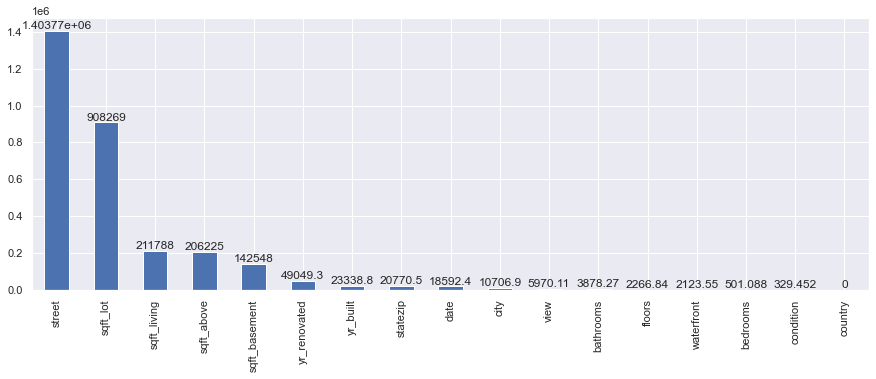

In [129]:
chi_value = pd.Series(chi_score[0],index = df1.columns)
chi_value.sort_values(ascending = False,inplace = True)
ax =chi_value.plot.bar()
for bars in ax.containers:
    ax.bar_label(bars)

In [183]:
x = df.drop(columns=['price','country'])
x.shape

(4600, 16)

In [184]:
y = df['price']

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [186]:
lg = LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

In [187]:
predictions = lg.predict(x_test)
predictions

array([ 696.17527264, 1014.6575083 ,  257.309808  , ..., 1470.27127497,
        570.31350925,  566.84536444])

In [188]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

MAE: 256.22974730989426
MSE: 102532.20783082338
RMSE: 16.007177993322067


In [189]:
print(r2_score(y_test,predictions))

0.5109385151677541


  Using Decision Tree Regressor

In [190]:
d_tree = DecisionTreeRegressor()
d_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [196]:
predictions_d_tree = d_tree.predict(x_test)
predictions

array([ 235.,  598.,   48., ..., 1652.,  665.,  755.])

In [197]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions_d_tree))
print('MSE:',metrics.mean_squared_error(y_test,predictions_d_tree))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions_d_tree)))

MAE: 242.72028985507245
MSE: 122359.63333333333
RMSE: 15.579482977784354


In [198]:
print(r2_score(y_test,predictions_d_tree))

0.41636501127268644


Using Random Forest Regressor

In [195]:
d_regr = RandomForestRegressor()
d_regr.fit(x_train,y_train)

RandomForestRegressor()

In [199]:
predictions_d_regr = d_regr.predict(x_test)
predictions_d_regr

array([ 319.95,  789.08,  156.63, ..., 1223.23,  346.81,  692.25])

In [201]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions_d_tree))
print('MSE:',metrics.mean_squared_error(y_test,predictions_d_tree))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions_d_tree)))

MAE: 242.72028985507245
MSE: 122359.63333333333
RMSE: 15.579482977784354


In [202]:
print(r2_score(y_test,predictions_d_regr))

0.7012551070809208
